# Assignment Sheet 1:  Hands-on Linear Regression (deadline: 31 Oct, 14:00)

## Introduction

The goal of this first exercise sheet is to make you familiar with **jupyter notebook** which we will use to run part of the exercises in this class.

In order to do so you have to implement a very naive algorithm to solve a **linear regression** problem: **Grid Search**.

## Linear Regression

Linear regression is one of the simplest and also most widely used machine learning algorithms. It is used to model the relationship between a dependent variable $y$ and one or more independent (also called explanatory) variables $x$. Here, we will focus on the case where we just have a single indepenedent variable, so-called **simple linear regression**.

Given some inputs $x = \{x_0, \dots, x_n\}$ and corresponding outputs $y = \{y_0, \dots, y_n\}$. Linear regression assumes that there exists an (unknown!) linear relationship between the input and the output, i.e.

$$y = f(x) = \beta_0 + \beta_1x + \epsilon$$

where $\epsilon$ is an unobserved noise variable. This relationship is approximated as

$$\hat{y} = \hat{f}(x; w_0, w_1) = w_0 + w_1x$$.

Hence, the goal of linear regression is to estimate the unknown parameters $w_0$ and $w_1$ such that the error between the model prediction $\hat{y}$ and the true output $y$ is minimized. Formaly, let the ith **residual** be

$$r_i = y_i - \hat{f}(x_i; w_0, w_1)$$

i.e. the difference between the ith output and the ith prediction and let

$$S = \sum\limits_{i=1}^n r_i^2$$

be the sum of squared residuals. Then one tries to find the paramaters $w_0$ and $w_1$ that minimize

$$MSE = \frac{1}{n}~S$$

the so called **mean squared error**.

### 1. Exercise: Fitting a Linear Regression Model

In this exercise you will implement several functions which will help you to fit a simple linear regression model on training data using grid search.

**Before you start:**
- Make sure that you use numpy arrays instead of python lists.
- You can assume that all vectors are column vectors not row vectors.
- Hint: Try to vectorize as much of your computations as possible.

#### Task 1: Implement a loss function which measures the average squared difference between the true data and the model prediction, i.e the mean squared error (MSE).

**Points: 1.0**

In [155]:
# We will make use of numpy to vectorize most of the computations
import numpy as np
import sys

In [156]:
def loss(y, prediction):
    """
    :param y: The true outputs
    :param prediction: The predictions of your model
    :return: The MSE between the model predictions and the true outputs
    """
    # TODO: implement
    #arr_y = np.array(y)
    #arr_prediction = np.array(prediction)
    #assert arr_y.size == arr_prediction.size
    #N = arr_y.size
    N = y.size
    #error = arr_prediction - arr_y
    error = prediction - y
    mse = (np.sum(error**2))/N
    return mse


#### Task 2: Implement a function which describes a linear relationship between the input and output.

**Points: 0.5**

In [157]:
def linear_model(intercept, slope, x):
    """
    :param intercept: The model intercept
    :param slope: The model slope
    :return: The model prediction on x
    """
    # TODO: implement
    #x = np.array(x)
    y = slope * x + intercept
    return y
    

#### Task 3: Given different values for the slope and the intercept of your model. Implement a function which returns those that result in the best fit, i.e. minimizes the difference between the true data and the model prediction.

**Points: 4.0**

In [158]:
def grid_search(intercepts, slopes, x, y):
    """
    :param intercepts: A numpy array of different intercepts
    :param slopes: A numpy array of different slopes
    :param x: The inputs
    :param y: The true outputs
    :return (intercept, slope): The intercept and slope that result in the best fit
    """
    # TODO: implement
    #intercepts = np.array(intercepts)
    #slopes = np.array(slopes)
    #x = np.array(x)
    #y = np.array(y)
    #assert (intercepts.size == slopes.size)
    min_err = sys.maxsize
    min_index_i = 0
    min_index_j = 0
    predicted = []
    
    for i in range(intercepts.size):
        temp = []
        for j in range(slopes.size):
            temp.append(linear_model(intercepts[i], slopes[j], x))
        predicted.append(np.array(temp))
    predicted = np.array(predicted)
    
    for i in range(intercepts.size):
        for j in range(slopes.size):
            pred_out = predicted[i][j]
            mse = loss(y, pred_out)
            if mse < min_err:
                min_err = mse
                min_index_i = i
                min_index_j = j
    return (intercepts[min_index_i],slopes[min_index_j])
    

#### Task 4: Fit a linear model over some training data and plot the resulting model using matplotlib.

**Points: 1.5**

In [159]:
# We will use the datasets functionality provided by sklearn to generate some training data
from sklearn.datasets import make_regression, make_classification

# Let's create some training data to fit our model on
x_train, y_train = make_regression(n_samples=50, n_features=1, n_informative=1, noise=30.0)
y_train = y_train[:, None] #  make y a column vector

In [160]:
# This is the test data on which we want to evaluate our fitted model
x_test = np.linspace(start=-4, stop=4, num=20)
x_test = x_test[:, None] #  make x_test a column vector

In [161]:
# These are the different values for the intercept and slope on which we want to perform a gridsearch
intercepts = np.linspace(start=-10.0, stop=10.0, num=50)
intercepts = intercepts[:, None] #  make intercepts a column vector
print (intercepts.size)
slopes = np.linspace(start=0.0, stop=100.0, num=50)
slopes = slopes[:, None] #  make slopes a column vector

50


**Write code to fit a linear model on $x_{train}$.**

In [162]:
# TODO: fit a linear model on x_train
return_val = grid_search(intercepts, slopes, x_train, y_train)
intercept = return_val[0]
slope = return_val[1]
y_out = slope * x_train + intercept
print ("Slope:",slope)
print("Intercept:",intercept)

Slope: [ 91.83673469]
Intercept: [-3.06122449]


**Complete the code below to plot the training data together with the fitted linear model.**

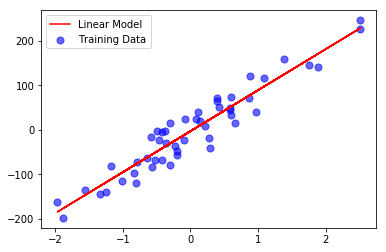

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create a matplotlib figure for the training data and our fitted linear regression model
fig, axes = plt.subplots(1, 1)
axes.scatter(x_train, y_train, color='blue', marker='.', alpha=.6, s=2e2, label='Training Data')
axes.plot(x_train, y_out, color='red', ls='-', label='Linear Model')
axes.legend(loc='upper left');

#### Task 5: Run the code above several times. Each time the generated data will be different. How would you interpret the result? Is the obtained fit good enough? What are disadvantages of the grid search approach and what could be other (better) ways of fitting a linear model?

**Points: 3.0**

- *(put your answers here)*
- *(put your answers here)*
- *(put your answers here)*
- *(put your answers here)*




## Submission instructions
You should provide a single Jupyter notebook as a solution. The naming should include the assignment number and matriculation IDs of all team members in the following format:
**assignment-1_matriculation1_matriculation_2_matriculation3.ipynb** (in case of 3 team members). 
Make sure to keep the order matriculation1_matriculation_2_matriculation3 the same for all assignments.

Please, submit your solution to your tutor (with **[NNIA][assignment-1]** in email subject):
1. Maksym Andriushchenko s8mmandr@stud.uni-saarland.de
2. Marius Mosbach s9msmosb@stud.uni-saarland.de
3. Rajarshi Biswas rbisw17@gmail.com

**If you are in a team, please submit only 1 solution to only 1 tutor.**